## XGBoost for classication of diabetes onset prediction data
Adapted from https://www.kaggle.com/code/soheiltehranipour/xgboost-tutorial-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load data
df = pd.read_csv('datasets_228_482_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

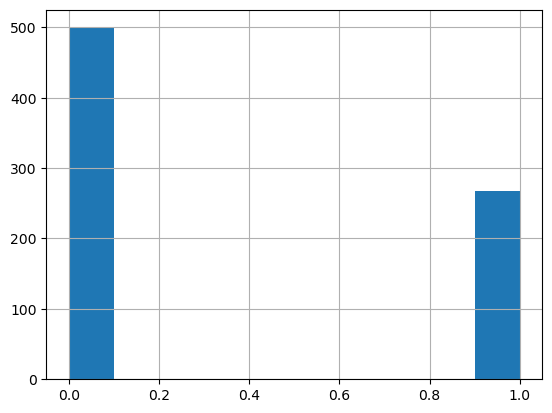

In [3]:
# What is the baseline?  Let's look at a histogram of y (outcome)
df["Outcome"].hist()

### We can see that roughly 1/3 of the samples are "False", which means that any classifer with accuracy below 66% is useless.

In [4]:
# split data into X and y
# in thie notebook, we use ".values" which will convert the data
# to numpy matrices
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
type(X)

numpy.ndarray

In [5]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [7]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred) * 100
print("Train accuracy of the XGBClassifer Model: ", accuracy)

Train accuracy of the XGBClassifer Model:  100.0


In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Test accuracy of the XGBClassifer Model: ",accuracy)

Test accuracy of the XGBClassifer Model:  75.32467532467533


## What can you learn from the last application of XGBClassifer? Is there overfitting?  Try to tune the parameters to get an improved result on the test set.  Note that you don't have that much data, so you can't try too many things because you will get improvements "by chance".   What is the best you can get using logistic regression?

In [19]:
#Your analysis and code below...  
# Define the parameter values to try finding the best combination of parameters to get the best accuracy for the test set
learning_rates = [0.1, 0.01, 0.001]
max_depths = [3, 5, 7]
n_estimators = [100, 500, 1000]
subsamples = [0.8, 0.9, 1.0]
colsample_bytrees = [0.8, 0.9, 1.0]

best_accuracy = 0
best_params = {}

for learning_rate in learning_rates:
    for max_depth in max_depths:
        for n_estimator in n_estimators:
            for subsample in subsamples:
                for colsample_bytree in colsample_bytrees:
                    model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimator, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred) * 100
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {"learning_rate": learning_rate, "max_depth": max_depth, "n_estimator": n_estimator, "subsample": subsample, "colsample_bytree": colsample_bytree}

print("Best accuracy: ", best_accuracy)
print("Best parameters: ", best_params)




Best accuracy:  81.81818181818183
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimator': 100, 'subsample': 0.9, 'colsample_bytree': 0.8}


In [20]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the training data
y_pred_train = logreg.predict(X_train)

# Calculate the accuracy of the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train) * 100
print("Train accuracy of the Logistic Regression Model: ", accuracy_train)

# Predict the target variable for the test data
y_pred_test = logreg.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy_test = accuracy_score(y_test, y_pred_test) * 100
print("Test accuracy of the Logistic Regression Model: ", accuracy_test)



Train accuracy of the Logistic Regression Model:  78.50162866449512
Test accuracy of the Logistic Regression Model:  78.57142857142857


c:\Users\STRON\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
